<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [75]:
df = pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA

In [76]:
print ('\n======================================= ((((( 5 First Records ))))) =======================================\n')
print(df.head())

print ('\n======================================= ((((( 5 Last Records ))))) =======================================\n')
print(df.tail())

print ('\n======================================= ((((( 5 Sample Records ))))) =======================================\n')
print(df.sample(5))

print ('\n======================================= ((((( Information of DataFrame ))))) =======================================\n')
print(df.info())

print ('\n======================================= ((((( Statistical description ))))) =======================================\n')
print(df.describe())

print ('\n======================================= ((((( Shape Of DataFrame ))))) =======================================\n')
print(df.shape)

print ('\n======================================= ((((( Columns Of DataFrame ))))) =======================================\n')
print(df.columns)

print ('\n======================================= ((((( Type Of DataFrame ))))) =======================================\n')
print(df.dtypes)

print ('\n=========================== ((((( Identifying the unique number of values in DataFrame ))))) ===========================\n')
print(df.nunique())

print ('\n======================================= ((((( groupby Pclass ))))) ========================================\n')
print(df.groupby('Gender').count())

print ('\n=================================== ((((( correlation between the features ))))) ===================================\n')
corr = df.corr()
print(corr)



======================================= ((((( 5 First Records ))))) =======================================

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88 

## Data Preprocessing

In [77]:
data = df.iloc[:, 3:14]

data.loc[data['Geography'] == 'France', 'Geography'] = 0
data.loc[data['Geography'] == 'Spain', 'Geography'] = 1
data.loc[data['Geography'] == 'Germany', 'Geography'] = 2

data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1

# change string value to numeric
data = data.apply(pd.to_numeric)

print ('\n=================================== ((((( missing values in data ))))) ===================================\n')
print(data.isnull().sum())

print ('\n======================================= ((((( Type Of data ))))) =======================================\n')
print('X=\n',data.dtypes)

print ('\n======================================= ((((( Head And Shape Of data ))))) =======================================\n')
print('Shape Of Data = ' , data.shape)
print ('\n\n')
data


=================================== ((((( missing values in data ))))) ===================================

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

======================================= ((((( Type Of data ))))) =======================================

X=
 CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

======================================= ((((( Head And Shape Of data ))))) =======================================

Shape Of Data =  (10000, 11)





,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


## Strorytelling - Visualization


============================== (((((the heatmap of correlation between the features ))))) ============================


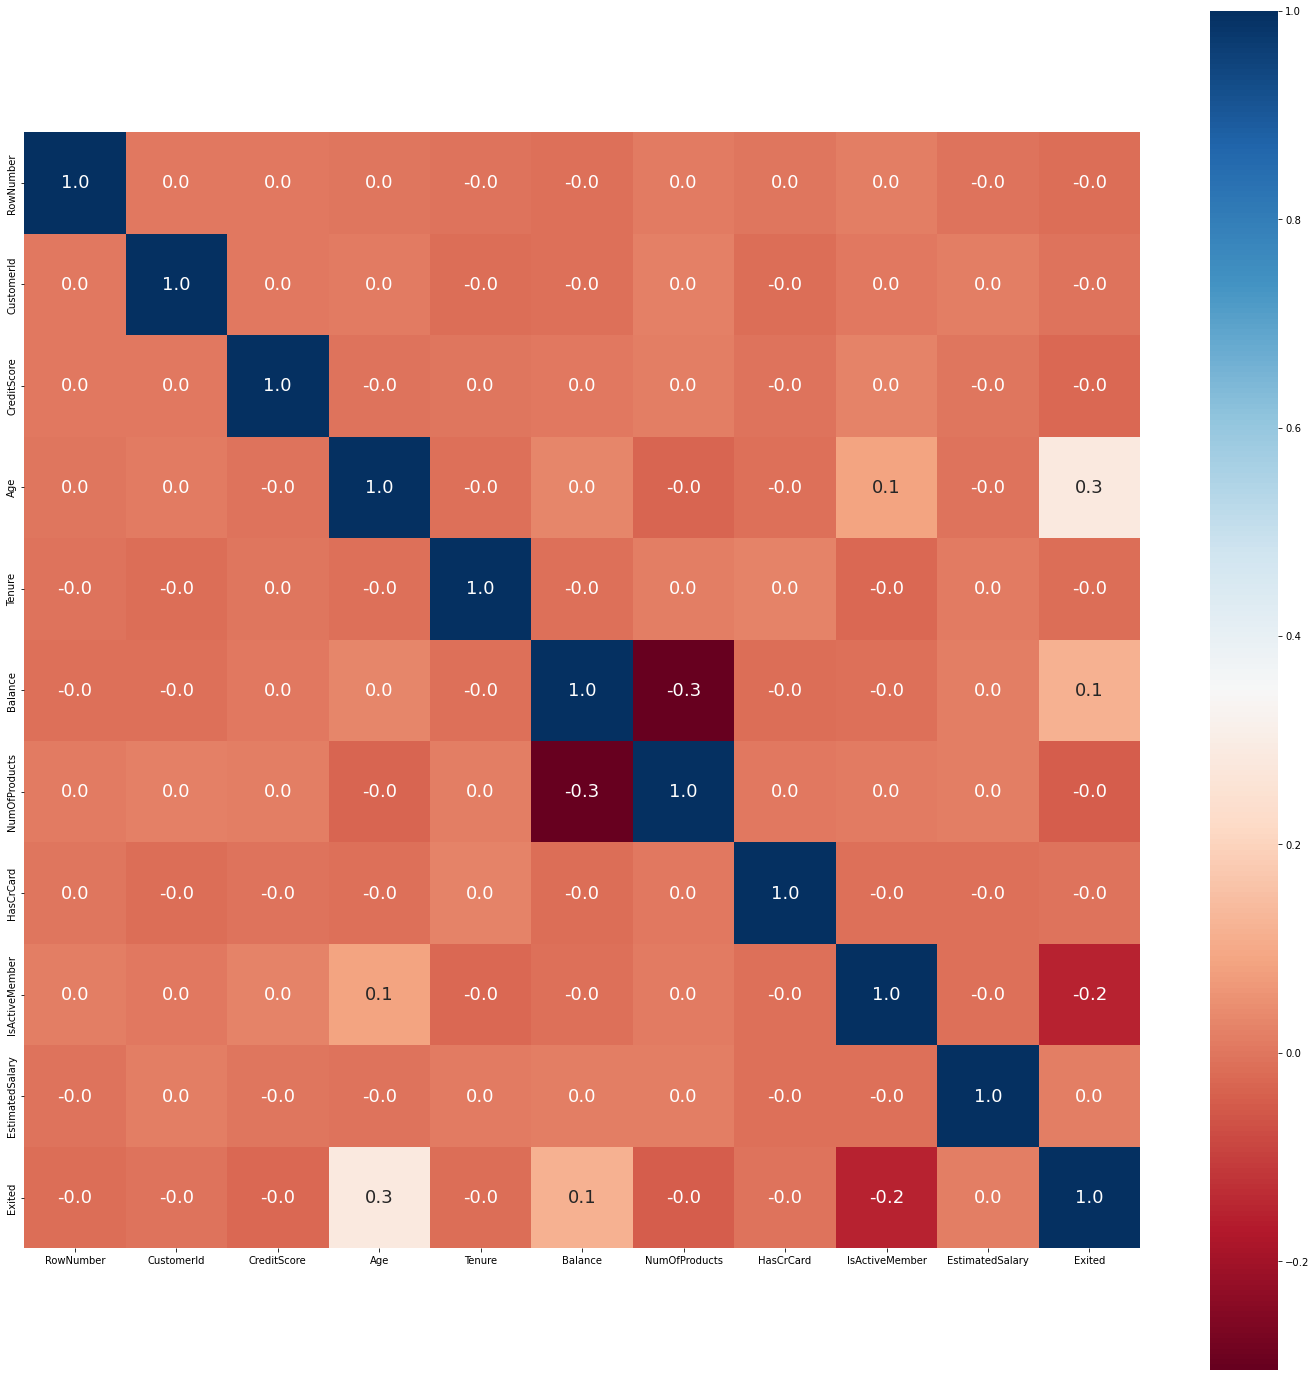

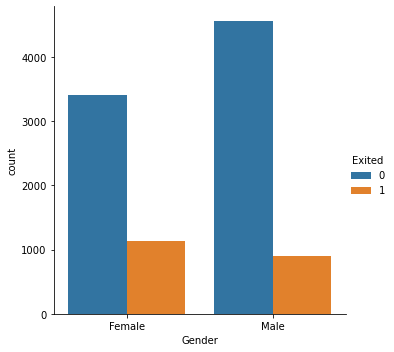

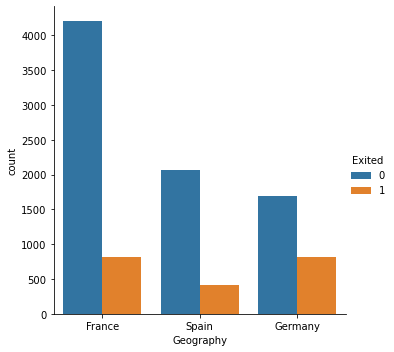

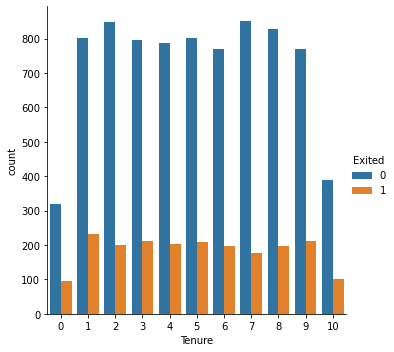

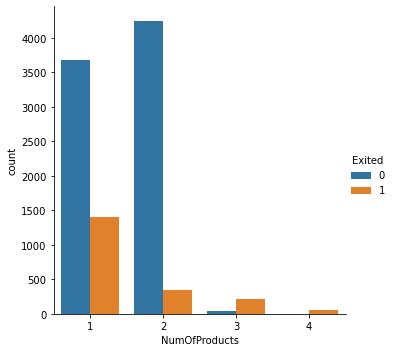

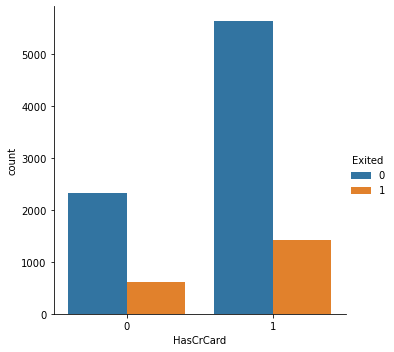

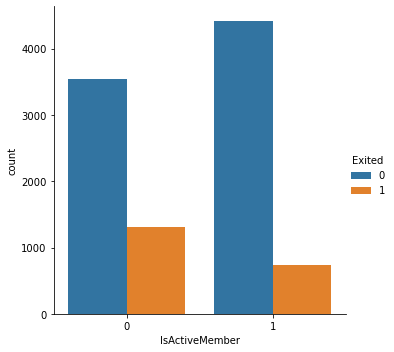

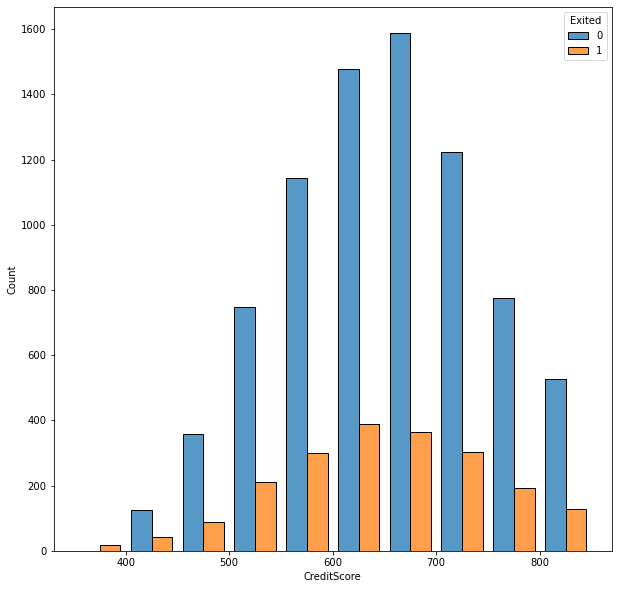

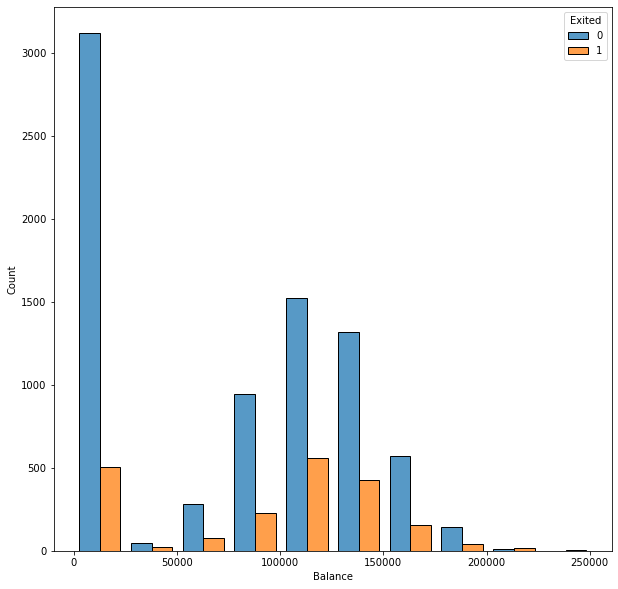

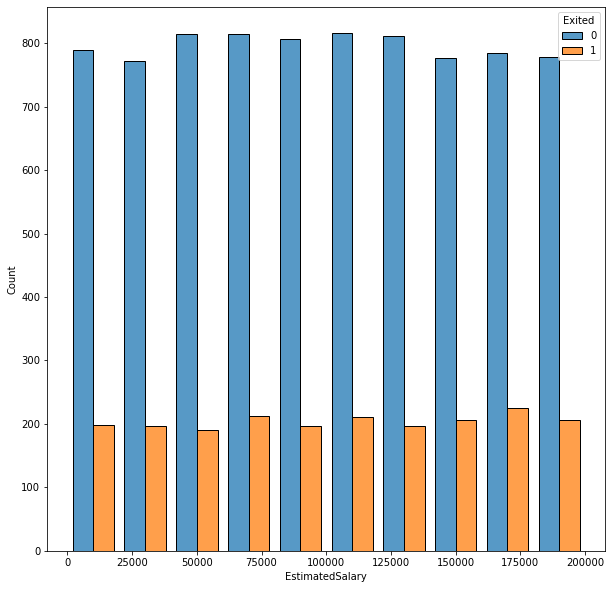

In [78]:
print ('\n============================== (((((the heatmap of correlation between the features ))))) ============================')
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':18}, cmap='RdBu');

sns.catplot(x='Gender' ,hue="Exited",kind="count", data=df);

sns.catplot(x='Geography' ,hue="Exited",kind="count", data=df);

sns.catplot(x='Tenure' ,hue="Exited",kind="count", data=df);

sns.catplot(x='NumOfProducts' ,hue="Exited",kind="count", data=df);

sns.catplot(x='HasCrCard' ,hue="Exited",kind="count", data=df);

sns.catplot(x='IsActiveMember' ,hue="Exited",kind="count", data=df);

plt.figure(figsize=(10,10))
sns.histplot(data=df, x="CreditScore", hue="Exited", bins=10, multiple="dodge", shrink=.8);

plt.figure(figsize=(10,10))
sns.histplot(data=df, x="Balance", hue="Exited", bins=10, multiple="dodge", shrink=.8);

plt.figure(figsize=(10,10))
sns.histplot(data=df, x="EstimatedSalary", hue="Exited", bins=10, multiple="dodge", shrink=.8);

## Prepare Data for Machine learning

In [79]:
X=data.drop(['Exited'], axis=1)
Y=data['Exited']

X = StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8000, 10)
(2000, 10)
(8000,)
(2000,)


## Train your model

In [80]:
#=================================== ((((( Logistic Regression ))))) ===================================
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#=================================== ((((( SVC classifier ))))) ===================================
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#=================================== ((((( RandomForest Classifier ))))) ===================================
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

#=================================== ((((( XGBoos Classifier ))))) ===================================
xgb = XGBClassifier()
xgb.fit(X_train, y_train);



## Test the model and show the metrics


=================================== ((((( Logistic Regression ))))) ===================================

The accuracy of Logistic Regression is:  81.0 %


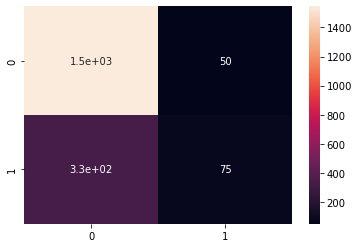

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.60      0.19      0.28       405

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


=================================== ((((( SVC classifier ))))) ===================================

The accuracy of SVC classifier  is:  79.75 %


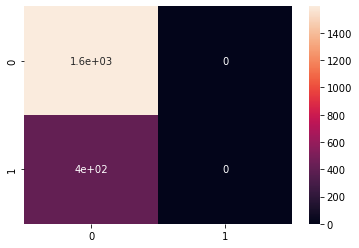

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000


=================================== ((((( RandomForest Classifier ))))) ===================================

The accuracy of RandomForest Classifier is:  85.75 %


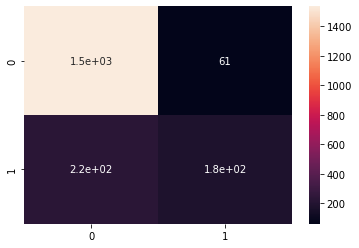

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1       0.75      0.45      0.56       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


=================================== ((((( XGBoos Classifier ))))) ===================================

The accuracy of RandomForest Classifier is:  85.75 %


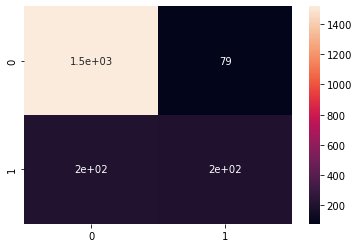

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [81]:
print ('\n=================================== ((((( Logistic Regression ))))) ===================================\n')
logreg_y_pred = logreg.predict(X_test)
print('The accuracy of Logistic Regression is: ', accuracy_score(y_test, logreg_y_pred)*100, '%')
confusion_matrix1=confusion_matrix(y_test, logreg_y_pred)
sns.heatmap(confusion_matrix1, annot=True)
plt.show()
print(classification_report(y_test,logreg_y_pred))

print ('\n=================================== ((((( SVC classifier ))))) ===================================\n')
svclassifier_y_pred = svclassifier.predict(X_test)
print('The accuracy of SVC classifier  is: ', accuracy_score(y_test, svclassifier_y_pred)*100, '%')
confusion_matrix2=confusion_matrix(y_test, svclassifier_y_pred)
sns.heatmap(confusion_matrix2, annot=True)
plt.show()
print(classification_report(y_test,svclassifier_y_pred))

print ('\n=================================== ((((( RandomForest Classifier ))))) ===================================\n')
rfc_y_pred = rfc.predict(X_test)
print('The accuracy of RandomForest Classifier is: ', accuracy_score(y_test, rfc_y_pred)*100, '%')
confusion_matrix3=confusion_matrix(y_test, rfc_y_pred)
sns.heatmap(confusion_matrix3, annot=True)
plt.show()
print(classification_report(y_test,rfc_y_pred))

print ('\n=================================== ((((( XGBoos Classifier ))))) ===================================\n')
xgb_y_pred = xgb.predict(X_test)
print('The accuracy of RandomForest Classifier is: ', accuracy_score(y_test, rfc_y_pred)*100, '%')
confusion_matrix3=confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(confusion_matrix3, annot=True)
plt.show()
print(classification_report(y_test,xgb_y_pred))


## Save your final model

In [82]:
# save
with open('LogisticRegression.pkl','wb') as f:
    pickle.dump(logreg,f)
with open('svclassifier.pkl','wb') as f:
    pickle.dump(svclassifier,f)
with open('RandomForestClassifier.pkl','wb') as f:
    pickle.dump(rfc,f)
with open('XGBoosClassifier.pkl','wb') as f:
    pickle.dump(xgb,f)
